In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

## Visualization

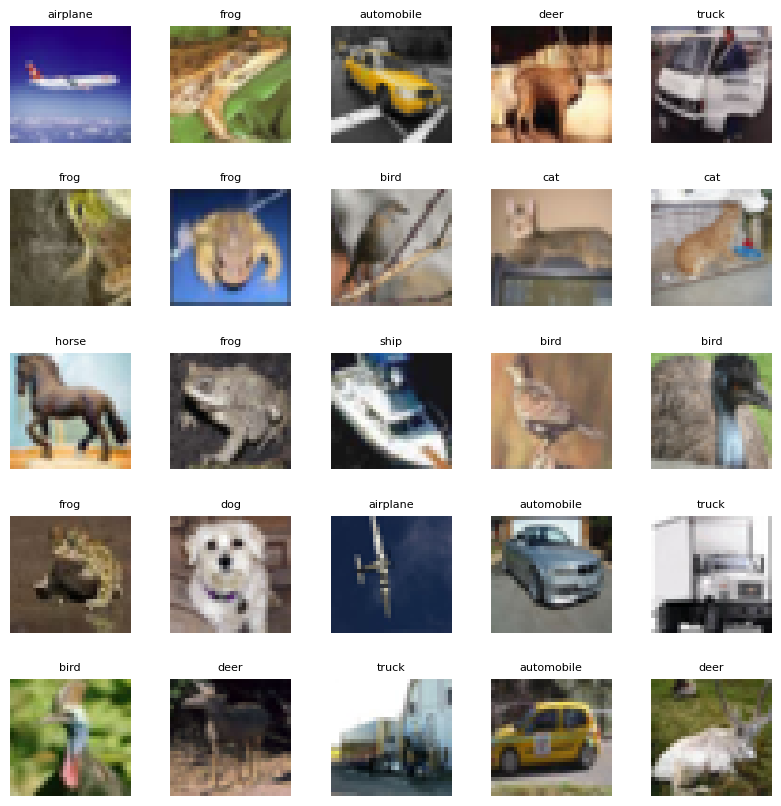

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array
n_train = len(X_train) # get the length of the train dataset

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

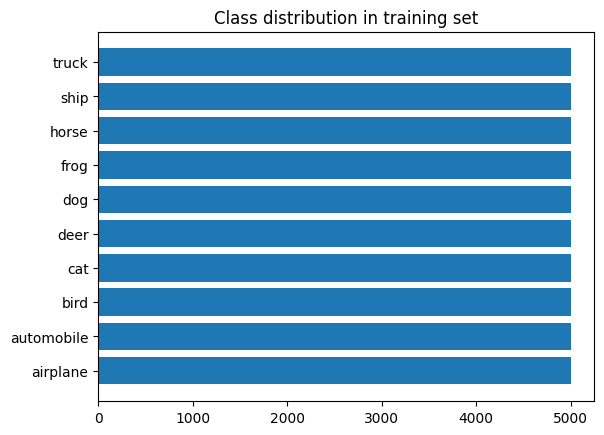

In [8]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')
# all classes are the same count 

Text(0.5, 1.0, 'Class distribution in testing set')

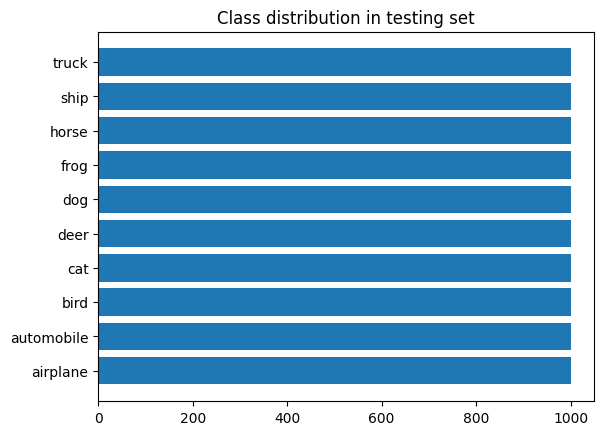

In [9]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in testing set') 
# all classes are the same count  in y_test 

## Data Preprocessing

In [10]:
# Scale the data
X_train = X_train / 255
X_test = X_test / 255

# Transform target variable into one-hotencoding
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

## Model

In [11]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [13]:
hist = model.fit(X_train, y_categorical_train, epochs=20, batch_size = 64, validation_data=(X_test, y_categorical_test))

Epoch 1/20
782/782 [==============================] - 80s 97ms/step - loss: 1.6365 - accuracy: 0.4154 - precision: 0.6259 - recall: 0.2117 - val_loss: 1.4429 - val_accuracy: 0.5040 - val_precision: 0.6551 - val_recall: 0.3536
Epoch 2/20
782/782 [==============================] - 83s 106ms/step - loss: 1.2410 - accuracy: 0.5573 - precision: 0.7202 - recall: 0.3903 - val_loss: 1.2777 - val_accuracy: 0.5439 - val_precision: 0.6558 - val_recall: 0.4227
Epoch 3/20
782/782 [==============================] - 84s 107ms/step - loss: 1.0868 - accuracy: 0.6145 - precision: 0.7559 - recall: 0.4752 - val_loss: 0.9591 - val_accuracy: 0.6621 - val_precision: 0.7657 - val_recall: 0.5538
Epoch 4/20
782/782 [==============================] - 93s 119ms/step - loss: 0.9811 - accuracy: 0.6540 - precision: 0.7778 - recall: 0.5329 - val_loss: 0.8839 - val_accuracy: 0.7009 - val_precision: 0.8007 - val_recall: 0.6041
Epoch 5/20
782/782 [==============================] - 98s 125ms/step - loss: 0.9168 - accurac

In [14]:
# Print test prediction accuracy
test_loss, test_acc, precision, recall = model.evaluate(X_test, y_categorical_test, verbose=2)
print("test accuracy: " + str(test_acc))

313/313 - 4s - loss: 0.6821 - accuracy: 0.7731 - precision: 0.8264 - recall: 0.7296 - 4s/epoch - 12ms/step
test accuracy: 0.7731000185012817


In [15]:
model.save('F:\AI\model')

INFO:tensorflow:Assets written to: F:\AI\model\assets


INFO:tensorflow:Assets written to: F:\AI\model\assets


In [16]:
model_load = tf.keras.models.load_model('F:\AI\model') 

In [17]:
# Print test prediction accuracy
test_loss, test_acc, precision, recall = model_load.evaluate(X_test, y_categorical_test, verbose=2)
print("test accuracy: " + str(test_acc))

313/313 - 4s - loss: 0.6821 - accuracy: 0.7731 - precision: 0.8264 - recall: 0.7296 - 4s/epoch - 12ms/step
test accuracy: 0.7731000185012817


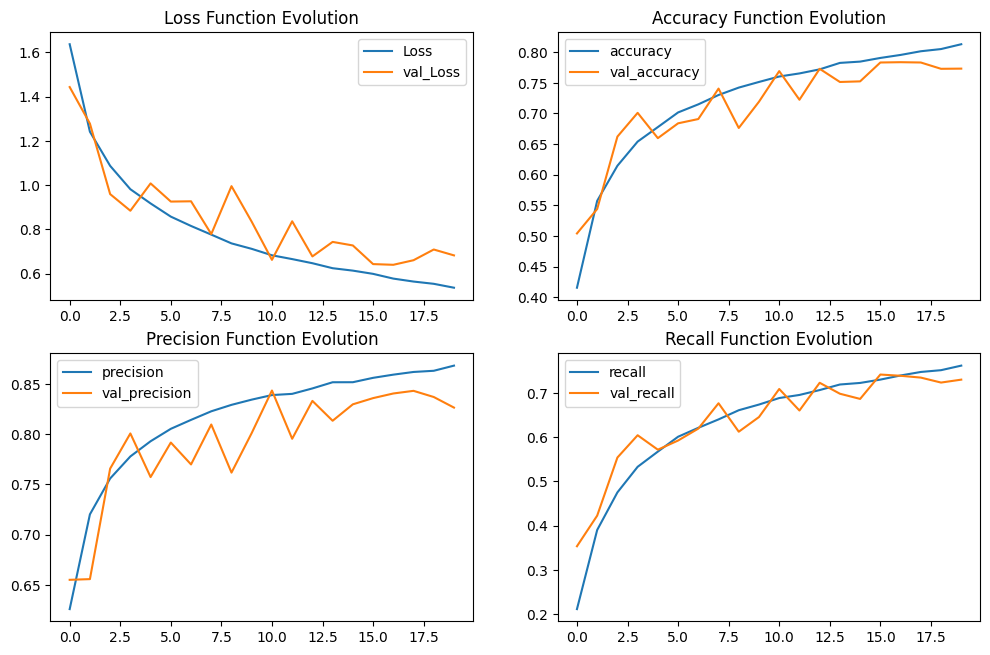

In [18]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)

plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(hist.history['precision'], label='precision')
plt.plot(hist.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(hist.history['recall'], label='recall')
plt.plot(hist.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [32]:
y_pred = model_load.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 4s 12ms/step


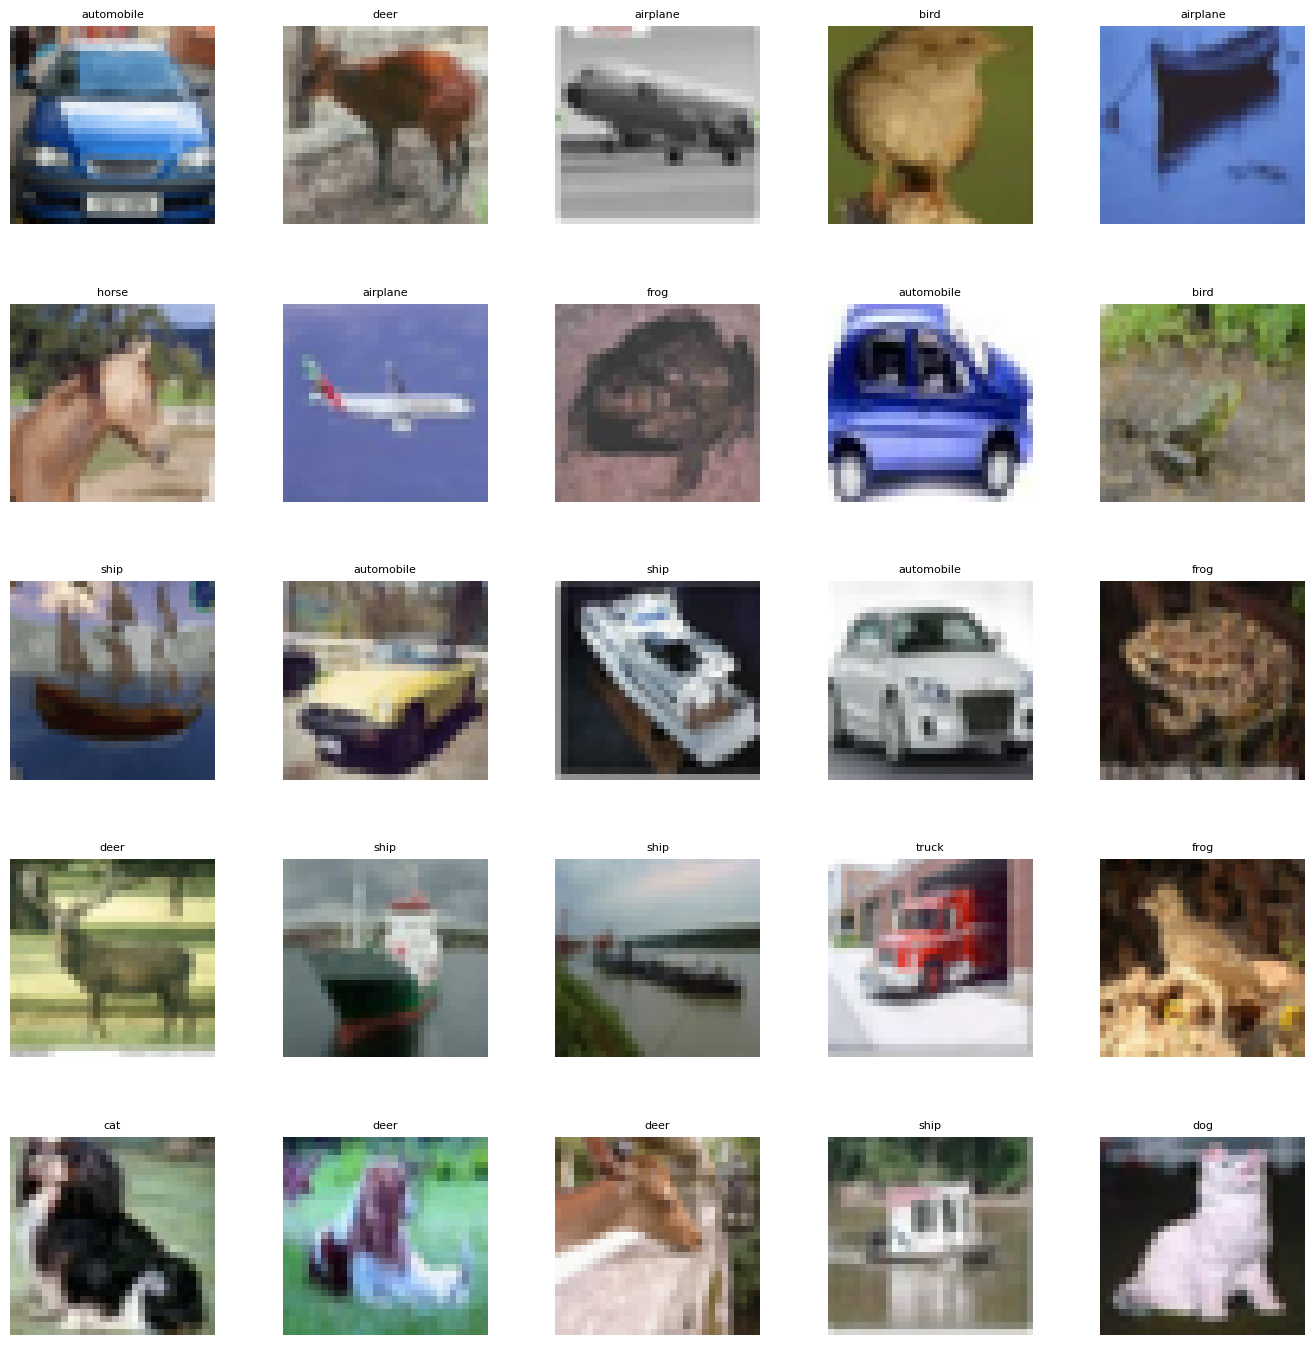

In [43]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [59]:
y_test[2]

array([8], dtype=uint8)

In [51]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

In [60]:
labels[8]

'ship'

In [62]:
y_pred[2]

8

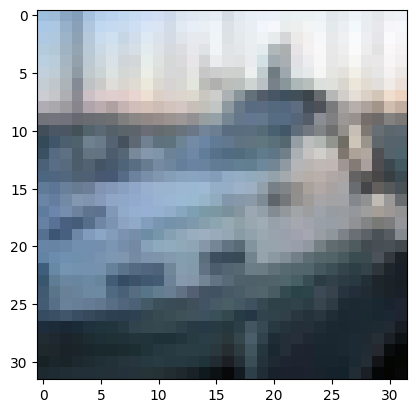

In [58]:
plt.imshow(X_test[2])